## Diwali Sales Analysis -- Python Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Diwali Sales Data.csv", encoding='latin1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


## Total Columns

In [2]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

## Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Drop Two Columns

In [4]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

## check for null values and drop it for specific column

In [5]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## Drop Null Values

In [6]:
df['Amount'].isnull().sum()   # before
df = df.dropna(subset=['Amount'])


0

In [7]:
df['Amount'].isnull().sum()   # after

0

## check for duplicates and remove them

In [10]:
df.duplicated().sum()


0

In [11]:
df = df.drop_duplicates()

## Check data types of columns

In [12]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

## rename Column name

In [13]:
df.rename(columns={'Age Group':'Age_Group'},inplace=True)

## Statistical Information

In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084982
std,12.756116,1.114880,5221.728776
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


## KPI's

In [26]:
Total_Sales=df['Total_Sales'].sum()

Total_Amount=df['Amount'].sum()

Total_Orders=df['Orders'].sum()

Total_Users=df['User_ID'].count()

print("Total_Sales:",Total_Sales)
print("--------------------")
print("Total_Amount:",Total_Amount)
print("--------------------")
print("Total_Orders:",Total_Orders)
print("--------------------")
print("Total_Users:",Total_Users)
print("--------------------")


Total_Sales: 263463869.32999998
--------------------
Total_Amount: 106178828.43
--------------------
Total_Orders: 27955
--------------------
Total_Users: 11231
--------------------


## Charts

In [15]:
df['Total_Sales']=df['Amount']*df['Orders']

In [16]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Total_Sales
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,71802.0


## 1) Countplot -- Count of Male and Female

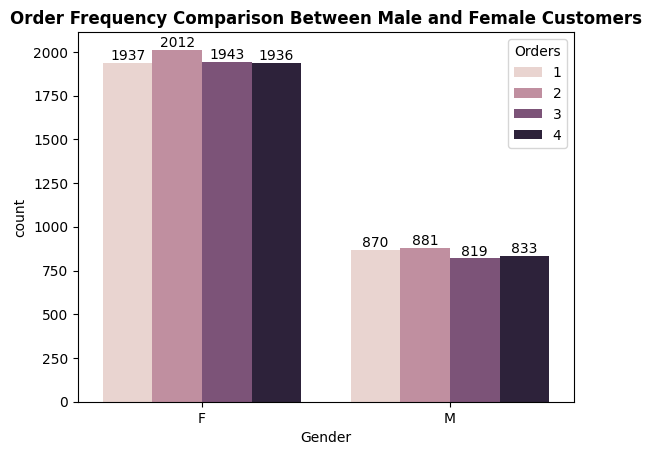

In [17]:
ax=sns.countplot(x='Gender',data=df,hue='Orders')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("Order Frequency Comparison Between Male and Female Customers",fontweight='bold')
plt.show()

### Insights From Above Chart: Female Customers Placed More Orders that Male Customers
### This suggests that female customers are more frequent purchasers1

## 2) BarPlot -- Top 5 Customers by Total Orders

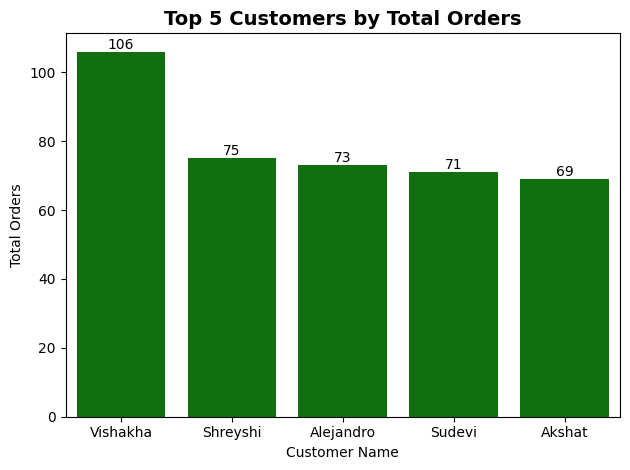

In [18]:
top=df.groupby('Cust_name')['Orders'].sum().sort_values(ascending=False).head(5)

ax=sns.barplot(x=top.index,y=top.values, color='g')
ax.bar_label(ax.containers[0])
plt.title("Top 5 Customers by Total Orders", fontsize=14, fontweight='bold')
plt.xlabel("Customer Name")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.show()

In [19]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

## 3) State-wise Sales Analysis

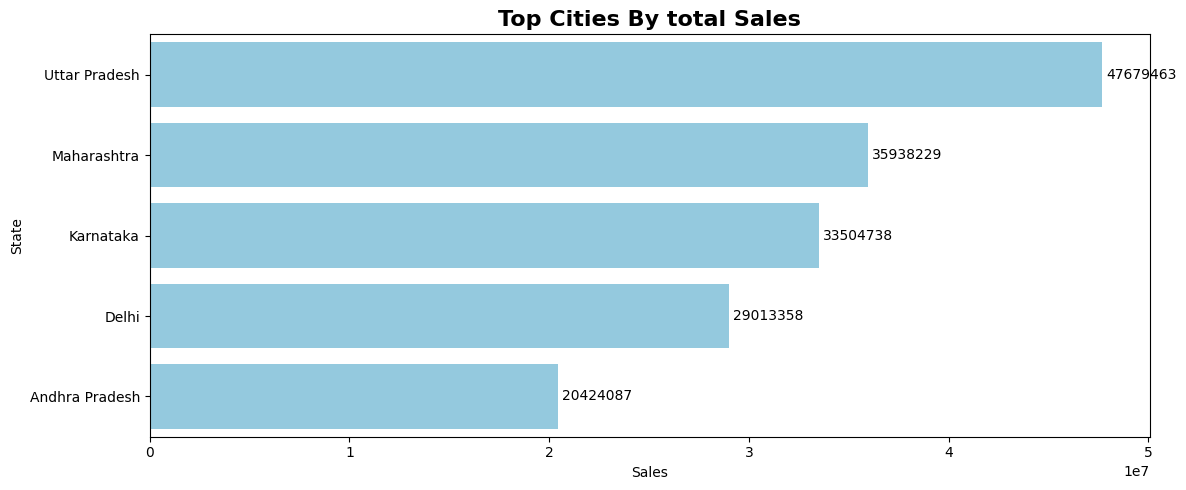

In [20]:
top=df.groupby('State')['Total_Sales'].sum().sort_values(ascending=False).sort_values(ascending=False).head(5)

plt.figure(figsize=(12,5))
ax=sns.barplot(x=top.values,y=top.index, color='skyblue')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)
plt.title("Top Cities By total Sales", fontsize=16, fontweight='bold')
plt.xlabel("Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### Insights From Above Chart : As we can see from above chart "Uttar Pradesh" and "Maharashtra" Have More Sales

## 4) Histogram -- Customer Distribution by Age Group and Gender

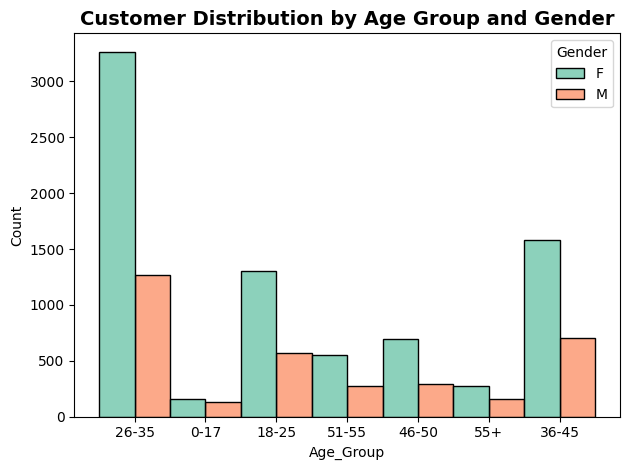

In [21]:
sns.histplot(x='Age_Group',data=df,hue='Gender',palette='Set2',multiple='dodge')
plt.title('Customer Distribution by Age Group and Gender', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Insights From Above Chart : The majority of customers belong to the 26–35 age group
### This indicates that the business’s primary target audience is adult females between 26 and 35 years old, 
### while younger and older age groups show lower engagement.

In [22]:
df['Age_Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

## 5) Pie Chart -- Orders By Zone

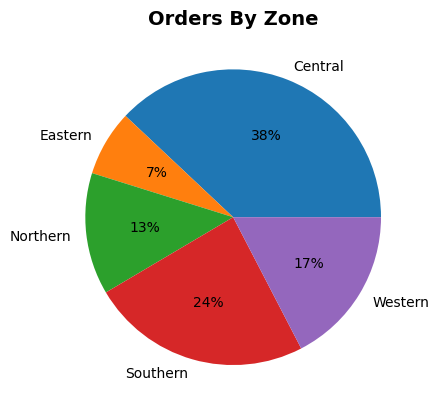

In [23]:
gb=df.groupby('Zone')['Orders'].sum()
plt.pie(gb,labels=gb.index,autopct='%1.0f%%')
plt.title("Orders By Zone",fontsize=14, fontweight='bold')
plt.show()

### Insights From Above Chart : With 38% of total orders, the Central zone is strongest performer..
### With 7% of total orders, the Eastrn zone is your Lowest performer

In [27]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

## 6) Bar Chart -- Top 5 Product Categories by Total Orders

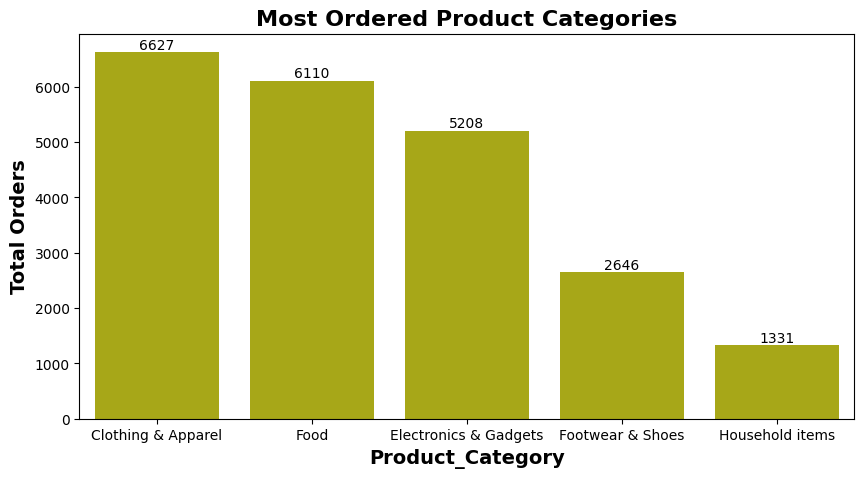

In [47]:
top=df.groupby('Product_Category') ['Orders'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
ax=sns.barplot(x=top.index,y=top.values,color='y')
ax.bar_label(ax.containers[0])
plt.xlabel("Product_Category", fontsize=14, fontweight='bold')
plt.ylabel("Total Orders", fontsize=14, fontweight='bold')
plt.title("Most Ordered Product Categories", fontsize=16, fontweight='bold')
plt.show()

### Insights From Above Chart : Clothing & Apparel and Food Are the most ordered Product_category with 6627 and 6110 Total Orders